In [1]:
import tensorflow as tf
import numpy as np 
import pandas 

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
iris = pandas.read_csv("Desktop/iris.csv")

iris.iloc[:,0:4] = iris.iloc[:,0:4].astype(np.float32)

iris["Species"] = iris["Species"].map({"Iris-setosa":0,"Iris-virginica":1,"Iris-versicolor":2})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,1:5], iris["Species"], test_size=0.33, random_state=42)

columns = iris.columns[0:4]

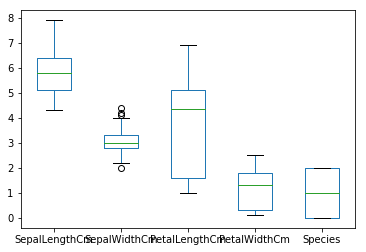

In [3]:
iris.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7bb9e8>,
      dtype=object)

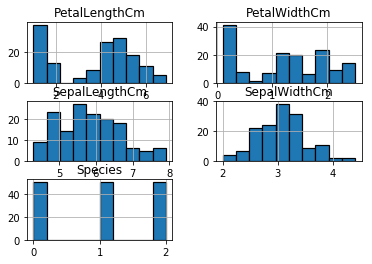

In [4]:
iris.hist(edgecolor='black', linewidth=1.2)

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values


from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,1:5], iris["Species"], test_size=0.33, random_state=42)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


In [8]:
X, y = X_train, y_train


In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 6), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [10]:
clf.predict(X_test)

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 2, 1])

In [11]:
clf.score(X_test, y_test)

1.0

In [12]:
print(X_test)

     SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
73            2.8            4.7           1.2        2
18            3.8            1.7           0.3        0
118           2.6            6.9           2.3        1
78            2.9            4.5           1.5        2
76            2.8            4.8           1.4        2
31            3.4            1.5           0.4        0
64            2.9            3.6           1.3        2
141           3.1            5.1           2.3        1
68            2.2            4.5           1.5        2
82            2.7            3.9           1.2        2
110           3.2            5.1           2.0        1
12            3.0            1.4           0.1        0
36            3.5            1.3           0.2        0
9             3.1            1.5           0.1        0
19            3.8            1.5           0.3        0
56            3.3            4.7           1.6        2
104           3.0            5.8           2.2  

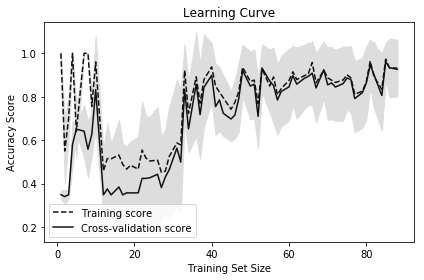

In [13]:
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 70))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()